In [1]:
import numpy as np 
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
df=pd.read_csv("Real estate.csv")

In [73]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [74]:
df=df.drop("No",axis=1)
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [24]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [25]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [26]:
df.corr()["Y house price of unit area"].sort_values()

X3 distance to the nearest MRT station   -0.673613
X2 house age                             -0.210567
X1 transaction date                       0.087491
X6 longitude                              0.523287
X5 latitude                               0.546307
X4 number of convenience stores           0.571005
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

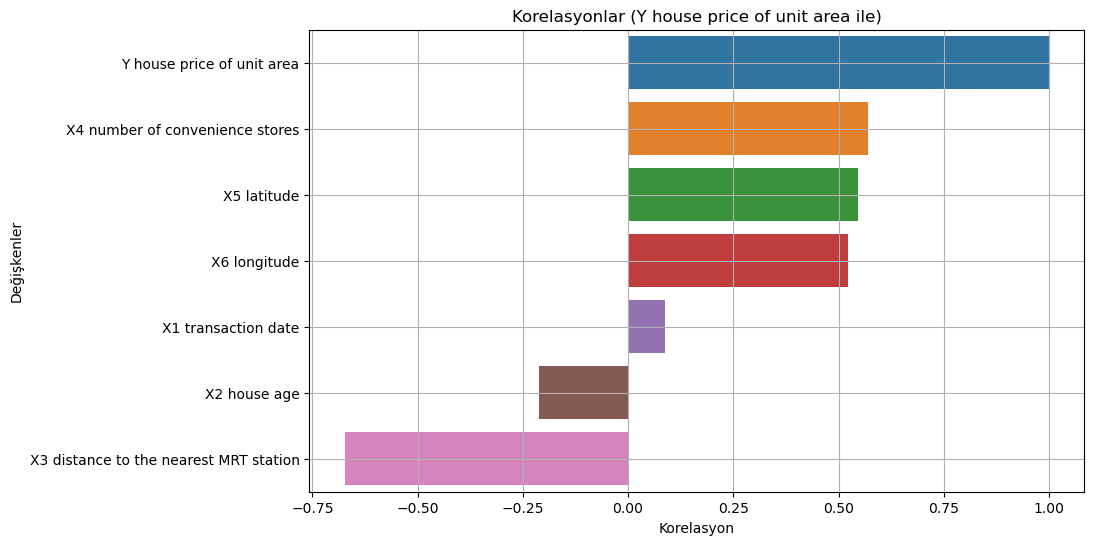

In [27]:
corr_matrix = df.corr()
target_corr = corr_matrix["Y house price of unit area"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sbn.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Korelasyonlar (Y house price of unit area ile)")
plt.xlabel("Korelasyon")
plt.ylabel("Değişkenler")
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X1 transaction date'>

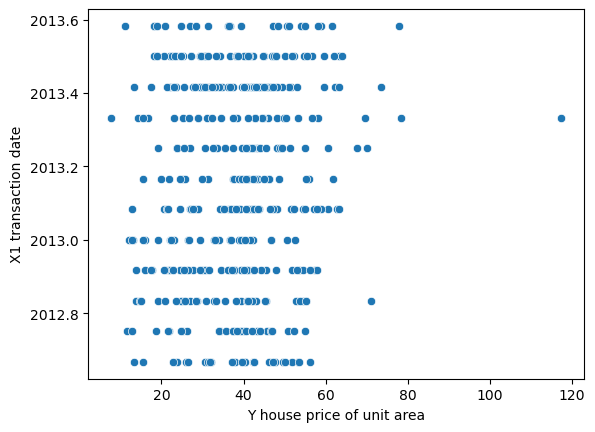

In [28]:
sbn.scatterplot(data=df,x="Y house price of unit area",y="X1 transaction date" )

In [75]:
df=df.drop("X1 transaction date",axis=1)
df.sort_values("Y house price of unit area",ascending=False).head(10)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,10.8,252.58220,1,24.97460,121.53046,117.5
220,37.2,186.51010,9,24.97703,121.54265,78.3
312,35.4,318.52920,9,24.97071,121.54069,78.0
166,0.0,292.99780,6,24.97744,121.54458,73.6
105,0.0,292.99780,6,24.97744,121.54458,71.0
16,0.0,292.99780,6,24.97744,121.54458,70.1
379,0.0,292.99780,6,24.97744,121.54458,69.7
389,40.9,122.36190,8,24.96756,121.54230,67.7
413,6.5,90.45606,9,24.97433,121.54310,63.9
361,41.4,281.20500,8,24.97345,121.54093,63.3


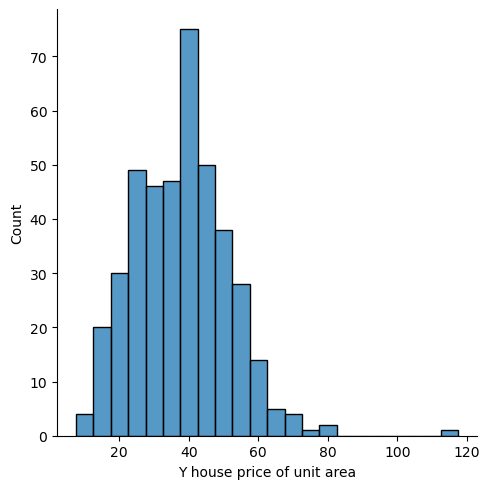

In [32]:
sbn.displot(df["Y house price of unit area"])

In [33]:
len(df)

414

In [76]:
df=df.sort_values("Y house price of unit area",ascending=False).iloc[4:]
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
105,0.0,292.99780,6,24.97744,121.54458,71.0
16,0.0,292.99780,6,24.97744,121.54458,70.1
379,0.0,292.99780,6,24.97744,121.54458,69.7
389,40.9,122.36190,8,24.96756,121.54230,67.7
413,6.5,90.45606,9,24.97433,121.54310,63.9
...,...,...,...,...,...,...
226,16.5,4082.01500,0,24.94155,121.50381,12.8
116,30.9,6396.28300,1,24.94375,121.47883,12.2
162,16.0,4066.58700,0,24.94297,121.50342,11.6
347,17.4,6488.02100,1,24.95719,121.47353,11.2


In [46]:
y=df["Y house price of unit area"].values

In [47]:
x=df.drop("Y house price of unit area",axis=1).values

In [48]:
x.shape

(410, 5)

In [49]:
y.shape

(410,)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train ,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33 , random_state=42 )

In [52]:
x_test.shape

(136, 5)

In [53]:
x_train.shape

(274, 5)

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler=MinMaxScaler()

In [56]:
x_train=scaler.fit_transform(x_train)

In [57]:
x_test=scaler.fit_transform(x_test)

In [58]:
x_test

array([[0.37442922, 0.05359715, 0.6       , 0.30900876, 0.741631  ],
       [1.        , 0.00124923, 0.7       , 0.35528478, 0.71924048],
       [0.31050228, 0.0697332 , 0.5       , 0.32311062, 0.68280101],
       [0.17808219, 0.00868951, 0.5       , 0.34487952, 0.71902096],
       [0.12328767, 0.05371477, 0.5       , 0.51779847, 0.73855779],
       [0.        , 0.02139225, 0.        , 0.40457284, 0.62056854],
       [0.72374429, 0.8606747 , 0.1       , 0.1286966 , 0.1033915 ],
       [0.52511416, 0.01281523, 0.6       , 0.20646221, 0.68587422],
       [0.3173516 , 0.63494517, 0.        , 1.        , 0.47195698],
       [0.70319635, 0.05170224, 0.6       , 0.31106243, 0.70771595],
       [0.20776256, 0.21308264, 0.        , 0.6043264 , 0.57556799],
       [0.28995434, 0.01898141, 0.1       , 0.44030668, 0.60015366],
       [0.39497717, 0.34849578, 0.4       , 0.27751917, 0.40676106],
       [0.12785388, 0.3717461 , 0.        , 0.18483023, 0.92723082],
       [0.08447489, 0.0832412 , 0.

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model=Sequential()
model.add(Dense(50,activation="relu"))
model.add(Dense(45,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(35,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [61]:
model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test),batch_size=50 , epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 126ms/step - loss: 1528.9127 - val_loss: 1626.0253
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1518.3640 - val_loss: 1613.1807
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 1502.4838 - val_loss: 1591.2640
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 1473.0742 - val_loss: 1549.7021
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 1415.7457 - val_loss: 1465.3358
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 1299.5630 - val_loss: 1293.7346
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 1069.8948 - val_loss: 963.7183
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 660.7421 - val_loss: 441.6316
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 194.2572 - val_loss: 143.6035
Epoch 10/100
6/6 [==============================] - 0s 13ms/step - l

Epoch 82/100
6/6 [==============================] - 0s 16ms/step - loss: 41.2513 - val_loss: 68.8846
Epoch 83/100
6/6 [==============================] - 0s 15ms/step - loss: 41.0489 - val_loss: 63.7120
Epoch 84/100
6/6 [==============================] - 0s 15ms/step - loss: 41.0624 - val_loss: 72.8299
Epoch 85/100
6/6 [==============================] - 0s 14ms/step - loss: 40.4981 - val_loss: 63.4905
Epoch 86/100
6/6 [==============================] - 0s 14ms/step - loss: 40.5299 - val_loss: 69.0610
Epoch 87/100
6/6 [==============================] - 0s 15ms/step - loss: 42.3076 - val_loss: 68.7556
Epoch 88/100
6/6 [==============================] - 0s 16ms/step - loss: 40.6867 - val_loss: 62.8609
Epoch 89/100
6/6 [==============================] - 0s 17ms/step - loss: 40.5912 - val_loss: 72.0126
Epoch 90/100
6/6 [==============================] - 0s 14ms/step - loss: 40.5469 - val_loss: 64.6440
Epoch 91/100
6/6 [==============================] - 0s 15ms/step - loss: 39.8526 - val_loss

In [62]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

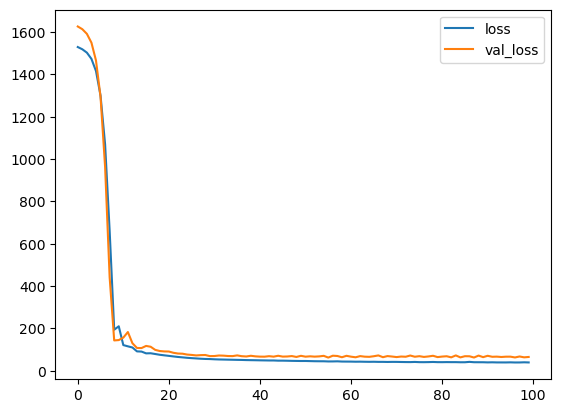

In [63]:
loss.plot()

In [65]:
deney=model.predict(x_test)

5/5 [==============================] - 0s 3ms/step


In [83]:
from sklearn.metrics import mean_absolute_error

In [84]:
mean_absolute_error(y_test,deney)

6.2808296736548925

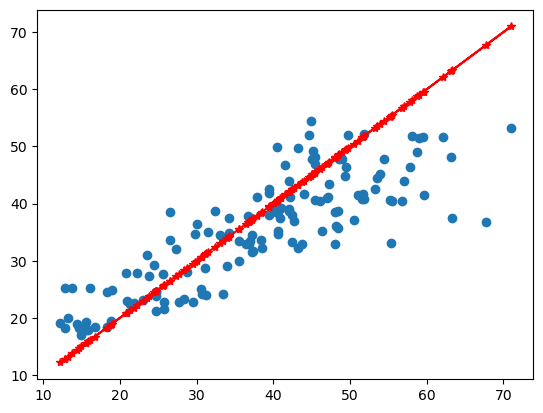

In [69]:
plt.scatter(y_test,deney)
plt.plot(y_test,y_test,"r-*")

In [82]:
veri=df.iloc[5]
veri

X2 house age                               41.40000
X3 distance to the nearest MRT station    281.20500
X4 number of convenience stores             8.00000
X5 latitude                                24.97345
X6 longitude                              121.54093
Y house price of unit area                 63.30000
Name: 361, dtype: float64

In [79]:
veri=df.drop("Y house price of unit area",axis=1).iloc[5]
veri

X2 house age                               41.40000
X3 distance to the nearest MRT station    281.20500
X4 number of convenience stores             8.00000
X5 latitude                                24.97345
X6 longitude                              121.54093
Name: 361, dtype: float64

In [80]:
veri=scaler.transform(veri.values.reshape(-1,5))
veri

array([[0.94520548, 0.03648302, 0.8       , 0.43674699, 0.72187466]])

In [81]:
model.predict(veri)

1/1 [==============================] - 0s 53ms/step


array([[37.46159]], dtype=float32)

In [135]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,17.681951,1091.897697,4.073171,24.968972,121.533300,37.503415
std,11.334892,1265.628248,2.934411,0.012454,0.015400,12.659615
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.962990,121.527600,27.400000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.350000
75%,27.900000,1455.798000,6.000000,24.977828,121.543305,46.175000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,71.000000


In [218]:
reg_model_diff = pd.DataFrame({'Actual value': y_test.ravel(), 'Predicted value': deney.ravel()})
reg_model_diff

,Actual value,Predicted value
0,40.6,34.685101
1,42.7,37.020695
2,43.8,32.924313
3,47.0,40.959858
4,49.5,46.465931
...,...,...
131,21.3,22.449902
132,29.8,34.703037
133,35.6,33.514736
134,42.2,41.199940
